## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [3]:
import os
import tensorflow.keras as keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [4]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [5]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [6]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp()

In [7]:
"""
Compile 模型
"""
optimizer = keras.optimizers.SGD(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [8]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Epoch 1/500
196/196 [==============================] - 2s 10ms/step - loss: 2.2864 - accuracy: 0.1465 - val_loss: 2.2315 - val_accuracy: 0.1926
Epoch 2/500
196/196 [==============================] - 2s 9ms/step - loss: 2.1962 - accuracy: 0.2042 - val_loss: 2.1602 - val_accuracy: 0.2225
Epoch 3/500
196/196 [==============================] - 2s 9ms/step - loss: 2.1322 - accuracy: 0.2377 - val_loss: 2.1045 - val_accuracy: 0.2534
Epoch 4/500
196/196 [==============================] - 2s 10ms/step - loss: 2.0819 - accuracy: 0.2640 - val_loss: 2.0594 - val_accuracy: 0.2808
Epoch 5/500
196/196 [==============================] - 2s 9ms/step - loss: 2.0415 - accuracy: 0.2868 - val_loss: 2.0236 - val_accuracy: 0.2902
Epoch 6/500
196/196 [==============================] - 2s 9ms/step - loss: 2.0091 - accuracy: 0.2981 - val_loss: 1.9947 - val_accuracy: 0.3062
Epoch 7/500
196/196 [==============================] - 2s 9ms/step - loss: 1.9824 - accuracy: 0.3082 - val_loss: 1.9697 - val_accuracy: 0.31

Epoch 58/500
196/196 [==============================] - 2s 10ms/step - loss: 1.6427 - accuracy: 0.4293 - val_loss: 1.6479 - val_accuracy: 0.4243
Epoch 59/500
196/196 [==============================] - 2s 10ms/step - loss: 1.6394 - accuracy: 0.4316 - val_loss: 1.6447 - val_accuracy: 0.4265
Epoch 60/500
196/196 [==============================] - 2s 10ms/step - loss: 1.6362 - accuracy: 0.4306 - val_loss: 1.6414 - val_accuracy: 0.4283
Epoch 61/500
196/196 [==============================] - 2s 10ms/step - loss: 1.6331 - accuracy: 0.4333 - val_loss: 1.6395 - val_accuracy: 0.4287
Epoch 62/500
196/196 [==============================] - 2s 10ms/step - loss: 1.6302 - accuracy: 0.4340 - val_loss: 1.6353 - val_accuracy: 0.4315
Epoch 63/500
196/196 [==============================] - 2s 10ms/step - loss: 1.6272 - accuracy: 0.4336 - val_loss: 1.6342 - val_accuracy: 0.4327
Epoch 64/500
196/196 [==============================] - 2s 10ms/step - loss: 1.6243 - accuracy: 0.4359 - val_loss: 1.6305 - val_ac

196/196 [==============================] - 2s 10ms/step - loss: 1.5092 - accuracy: 0.4775 - val_loss: 1.5328 - val_accuracy: 0.4660
Epoch 115/500
196/196 [==============================] - 2s 10ms/step - loss: 1.5074 - accuracy: 0.4771 - val_loss: 1.5327 - val_accuracy: 0.4653
Epoch 116/500
196/196 [==============================] - 2s 10ms/step - loss: 1.5056 - accuracy: 0.4783 - val_loss: 1.5297 - val_accuracy: 0.4651
Epoch 117/500
196/196 [==============================] - 2s 10ms/step - loss: 1.5037 - accuracy: 0.4784 - val_loss: 1.5298 - val_accuracy: 0.4651
Epoch 118/500
196/196 [==============================] - 2s 10ms/step - loss: 1.5018 - accuracy: 0.4783 - val_loss: 1.5277 - val_accuracy: 0.4652
Epoch 119/500
196/196 [==============================] - 2s 10ms/step - loss: 1.5003 - accuracy: 0.4786 - val_loss: 1.5291 - val_accuracy: 0.4623
Epoch 120/500
196/196 [==============================] - 2s 10ms/step - loss: 1.4981 - accuracy: 0.4803 - val_loss: 1.5258 - val_accuracy:

196/196 [==============================] - 2s 10ms/step - loss: 1.4170 - accuracy: 0.5081 - val_loss: 1.4713 - val_accuracy: 0.4838
Epoch 171/500
196/196 [==============================] - 2s 10ms/step - loss: 1.4154 - accuracy: 0.5097 - val_loss: 1.4640 - val_accuracy: 0.4869
Epoch 172/500
196/196 [==============================] - 2s 10ms/step - loss: 1.4135 - accuracy: 0.5081 - val_loss: 1.4678 - val_accuracy: 0.4831
Epoch 173/500
196/196 [==============================] - 2s 10ms/step - loss: 1.4129 - accuracy: 0.5101 - val_loss: 1.4660 - val_accuracy: 0.4855
Epoch 174/500
196/196 [==============================] - 2s 10ms/step - loss: 1.4114 - accuracy: 0.5101 - val_loss: 1.4650 - val_accuracy: 0.4851
Epoch 175/500
196/196 [==============================] - 2s 10ms/step - loss: 1.4095 - accuracy: 0.5099 - val_loss: 1.4718 - val_accuracy: 0.4812
Epoch 176/500
196/196 [==============================] - 2s 10ms/step - loss: 1.4080 - accuracy: 0.5109 - val_loss: 1.4636 - val_accuracy:

196/196 [==============================] - 2s 10ms/step - loss: 1.3387 - accuracy: 0.5327 - val_loss: 1.4194 - val_accuracy: 0.5008
Epoch 227/500
196/196 [==============================] - 2s 10ms/step - loss: 1.3369 - accuracy: 0.5331 - val_loss: 1.4168 - val_accuracy: 0.4981
Epoch 228/500
196/196 [==============================] - 2s 10ms/step - loss: 1.3360 - accuracy: 0.5337 - val_loss: 1.4151 - val_accuracy: 0.4957
Epoch 229/500
196/196 [==============================] - 2s 10ms/step - loss: 1.3345 - accuracy: 0.5356 - val_loss: 1.4122 - val_accuracy: 0.4967
Epoch 230/500
196/196 [==============================] - 2s 10ms/step - loss: 1.3335 - accuracy: 0.5352 - val_loss: 1.4151 - val_accuracy: 0.5019
Epoch 231/500
196/196 [==============================] - 2s 10ms/step - loss: 1.3316 - accuracy: 0.5350 - val_loss: 1.4245 - val_accuracy: 0.5027
Epoch 232/500
196/196 [==============================] - 2s 10ms/step - loss: 1.3309 - accuracy: 0.5354 - val_loss: 1.4091 - val_accuracy:

196/196 [==============================] - 2s 10ms/step - loss: 1.2695 - accuracy: 0.5555 - val_loss: 1.3832 - val_accuracy: 0.5117
Epoch 283/500
196/196 [==============================] - 2s 10ms/step - loss: 1.2672 - accuracy: 0.5570 - val_loss: 1.3815 - val_accuracy: 0.5174
Epoch 284/500
196/196 [==============================] - 2s 10ms/step - loss: 1.2672 - accuracy: 0.5579 - val_loss: 1.3808 - val_accuracy: 0.5144
Epoch 285/500
196/196 [==============================] - 2s 10ms/step - loss: 1.2650 - accuracy: 0.5579 - val_loss: 1.3839 - val_accuracy: 0.5123
Epoch 286/500
196/196 [==============================] - 2s 10ms/step - loss: 1.2643 - accuracy: 0.5587 - val_loss: 1.3957 - val_accuracy: 0.5085
Epoch 287/500
196/196 [==============================] - 2s 10ms/step - loss: 1.2636 - accuracy: 0.5591 - val_loss: 1.3875 - val_accuracy: 0.5104
Epoch 288/500
196/196 [==============================] - 2s 10ms/step - loss: 1.2618 - accuracy: 0.5597 - val_loss: 1.3845 - val_accuracy:

196/196 [==============================] - 2s 10ms/step - loss: 1.2052 - accuracy: 0.5795 - val_loss: 1.3581 - val_accuracy: 0.5243
Epoch 339/500
196/196 [==============================] - 2s 10ms/step - loss: 1.2043 - accuracy: 0.5801 - val_loss: 1.3601 - val_accuracy: 0.5203
Epoch 340/500
196/196 [==============================] - 2s 10ms/step - loss: 1.2028 - accuracy: 0.5795 - val_loss: 1.3586 - val_accuracy: 0.5231
Epoch 341/500
196/196 [==============================] - 2s 10ms/step - loss: 1.2018 - accuracy: 0.5808 - val_loss: 1.3561 - val_accuracy: 0.5242
Epoch 342/500
196/196 [==============================] - 2s 10ms/step - loss: 1.2008 - accuracy: 0.5790 - val_loss: 1.3516 - val_accuracy: 0.5259
Epoch 343/500
196/196 [==============================] - 2s 10ms/step - loss: 1.2004 - accuracy: 0.5813 - val_loss: 1.3554 - val_accuracy: 0.5227
Epoch 344/500
196/196 [==============================] - 2s 10ms/step - loss: 1.1987 - accuracy: 0.5812 - val_loss: 1.3640 - val_accuracy:

196/196 [==============================] - 2s 10ms/step - loss: 1.1447 - accuracy: 0.6003 - val_loss: 1.3456 - val_accuracy: 0.5275
Epoch 395/500
196/196 [==============================] - 2s 10ms/step - loss: 1.1434 - accuracy: 0.6017 - val_loss: 1.3584 - val_accuracy: 0.5205
Epoch 396/500
196/196 [==============================] - 2s 10ms/step - loss: 1.1428 - accuracy: 0.5997 - val_loss: 1.3446 - val_accuracy: 0.5256
Epoch 397/500
196/196 [==============================] - 2s 10ms/step - loss: 1.1418 - accuracy: 0.6013 - val_loss: 1.3392 - val_accuracy: 0.5289
Epoch 398/500
196/196 [==============================] - 2s 10ms/step - loss: 1.1411 - accuracy: 0.6019 - val_loss: 1.3352 - val_accuracy: 0.5319
Epoch 399/500
196/196 [==============================] - 2s 10ms/step - loss: 1.1386 - accuracy: 0.6027 - val_loss: 1.3405 - val_accuracy: 0.5304
Epoch 400/500
196/196 [==============================] - 2s 10ms/step - loss: 1.1389 - accuracy: 0.6025 - val_loss: 1.3330 - val_accuracy:

196/196 [==============================] - 2s 10ms/step - loss: 1.0856 - accuracy: 0.6212 - val_loss: 1.3500 - val_accuracy: 0.5312
Epoch 451/500
196/196 [==============================] - 2s 10ms/step - loss: 1.0864 - accuracy: 0.6203 - val_loss: 1.3461 - val_accuracy: 0.5263
Epoch 452/500
196/196 [==============================] - 2s 10ms/step - loss: 1.0833 - accuracy: 0.6229 - val_loss: 1.3601 - val_accuracy: 0.5244
Epoch 453/500
196/196 [==============================] - 2s 10ms/step - loss: 1.0844 - accuracy: 0.6218 - val_loss: 1.3275 - val_accuracy: 0.5332
Epoch 454/500
196/196 [==============================] - 2s 10ms/step - loss: 1.0820 - accuracy: 0.6232 - val_loss: 1.3978 - val_accuracy: 0.5098
Epoch 455/500
196/196 [==============================] - 2s 10ms/step - loss: 1.0819 - accuracy: 0.6243 - val_loss: 1.3425 - val_accuracy: 0.5305
Epoch 456/500
196/196 [==============================] - 2s 10ms/step - loss: 1.0811 - accuracy: 0.6226 - val_loss: 1.4192 - val_accuracy:

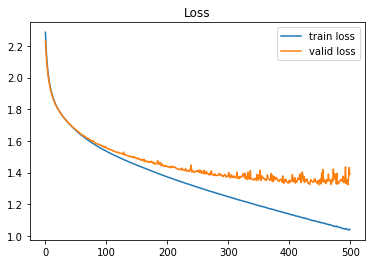

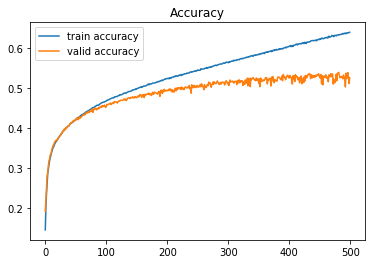

In [12]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

In [10]:
model.history.history

{'loss': [2.2863683700561523,
  2.196194648742676,
  2.132153272628784,
  2.081915855407715,
  2.0414891242980957,
  2.0091121196746826,
  1.982409954071045,
  1.9595487117767334,
  1.9395579099655151,
  1.9218051433563232,
  1.9061063528060913,
  1.8918706178665161,
  1.8791115283966064,
  1.867428183555603,
  1.8565304279327393,
  1.8468776941299438,
  1.837598443031311,
  1.829225778579712,
  1.8210638761520386,
  1.8136314153671265,
  1.8063194751739502,
  1.7995200157165527,
  1.7931703329086304,
  1.7866954803466797,
  1.7805759906768799,
  1.7747259140014648,
  1.7693626880645752,
  1.7636345624923706,
  1.7583595514297485,
  1.753090500831604,
  1.7479676008224487,
  1.7431269884109497,
  1.738311529159546,
  1.733607530593872,
  1.7288740873336792,
  1.7242844104766846,
  1.7199630737304688,
  1.715837001800537,
  1.7114392518997192,
  1.7073440551757812,
  1.7030153274536133,
  1.6994444131851196,
  1.695243239402771,
  1.691399097442627,
  1.687605619430542,
  1.683594226837